In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NumPy es un paquete de Python que significa “Numerical Python”, es la librería principal para la informática científica, proporciona potentes estructuras de datos, implementando matrices y matrices multidimensionales. Estas estructuras de datos garantizan cálculos eficientes con matrices.

Pandas es una librería de python destinada al análisis de datos, que proporciona unas estructuras de datos flexibles y que permiten trabajar con ellos de forma muy eficiente

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python

La librería seaborn permite personalizar el estilo del gráfico, la paleta de colores que se utiliza, la fuente y el tamaño de los diferentes integrantes de la visualización, así como definir un contexto en el que se va a utilizar el gráfico para adaptar el tamaño.

Ejercicio 1 (dataframe.df("nombres"))

In [2]:
#read_csv carga el contenido de un archivo csv en phyton
df=pd.read_csv('Centro_Comercial.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C) Estan las columnas que tiene la tabla junto con el numero de valores no nulos que tiene cada columna y el tipo de las columnas
Hay 5 columnas: el id, el Genero, la edad, el salario anual y la puntuacion de gasto que entiendo que sera el porcentaje del sueldo que se deja en el centro comercial 

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.columns = ['ID', 'Genero', 'Edad', 'Salario anual (miles de euros)',
       'Puntuacion de gastos (1-100)']

In [6]:
#iloc[] para seleccionar las filas que quieres mostrar
df.iloc[:8]

,ID,Genero,Edad,Salario anual (miles de euros),Puntuacion de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [7]:
#dimensiones del dataframe
df.shape

(200, 5)

g) 200 filas y 1000 atributos

In [8]:
#Estadisticas descriptivas
df.describe()

,ID,Edad,Salario anual (miles de euros),Puntuacion de gastos (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


i) La media de las edades esta entre entre los 38 y 39 años pero como tenemos una desviacion tipica de 13 nos hace pensar que los clientes tienen un rango de edades amplio, lo mismo nos pasa con el salario, ya que su media es 60 pero su desviacion es 26 lo que nos hace pensar que hay mucha desviacion entre los sueldos de los clientes y lo mismo nos pasa con la puntuacion de gastos

In [9]:
#Comprueba si hay algun valor nulo en el dataframe
df.isnull().values.any()

False

In [10]:
#Comprueba que los valores en este caso de Edad sean todos positivos
(df['Edad']<0).sum()

0

In [11]:
(df['Salario anual (miles de euros)']<0).sum()

0

In [12]:
(df['Puntuacion de gastos (1-100)']<0).sum()

0

Text(0.5, 1.0, 'Distribucion de la edad')

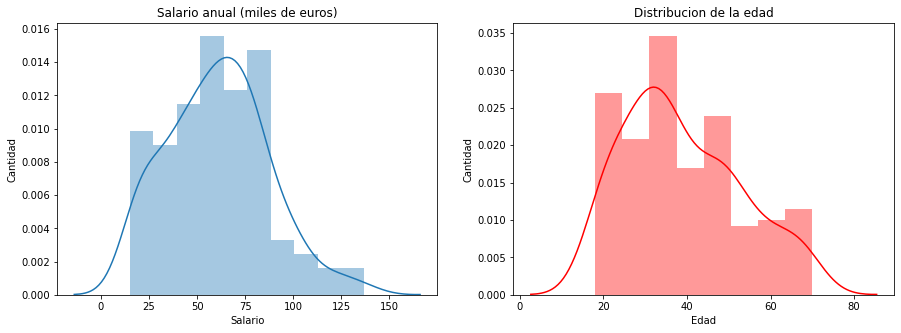

In [13]:
#para meter 2 graficas
fig,axs= plt.subplots(ncols=2, figsize=(15,5))
salario = sns.distplot(df['Salario anual (miles de euros)'],
                       axlabel="Salario", ax=axs[0])
salario.set_ylabel('Cantidad')
salario.set_title('Salario anual (miles de euros)')
edad = sns.distplot(df['Edad'], color='r',ax=axs[1])
edad.set_ylabel('Cantidad')
edad.set_title('Distribucion de la edad')

Text(0.5, 1.0, 'Distribucion de la edad')

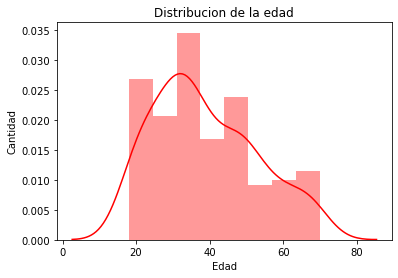

In [14]:
edad = sns.distplot(df['Edad'], color='r')
edad.set_ylabel('Cantidad')
edad.set_title('Distribucion de la edad')

l) Los histogramas represesentan por un lado el porcentaje clientes que cobran las distintas cantidades y despues las distintas edades de los clientes.
Se puede decir que en el salario la mayoria de los clentes cobran entre 20k y 80k  y que muy poca cantidad de cliente cobran mas de 80k.
Despues en la Edad podemos ver que la mayoria de los clientes estan entre los 20 y los 50 años.

m) norm_hist bool, opcional
Si es True, la altura del histograma muestra una densidad en lugar de un recuento. Esto está implícito si se traza un KDE o una densidad ajustada.
bins argumento para matplotlib hist (), o Ninguno, opcional
Especificación de hist bins. Si no se especifica, se utiliza una regla de referencia que intenta encontrar un valor predeterminado útil.

Text(0.5, 1.0, 'Distribucion de la puntuacion')

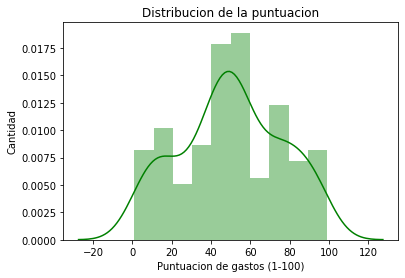

In [15]:
Puntuacion = sns.distplot(df['Puntuacion de gastos (1-100)'], color='g', bins=10,norm_hist=True)
Puntuacion.set_ylabel('Cantidad')
Puntuacion.set_title('Distribucion de la puntuacion')

n)La mayor parte de los clientes gasta entre el 40 y el 60 % de su sueldo en el centro comenrcial, luego otra gran cantidad de clientes gasta entre el 0 y el 20% o entre el 70 y 95% de su sueldo 

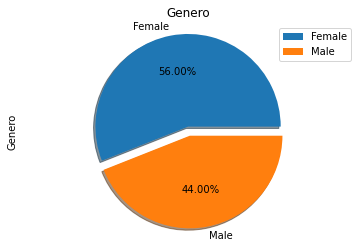

In [16]:
df['Genero'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, explode=[0.1,0])
plt.axis('equal')
plt.title('Genero')
plt.legend(loc="upper right")


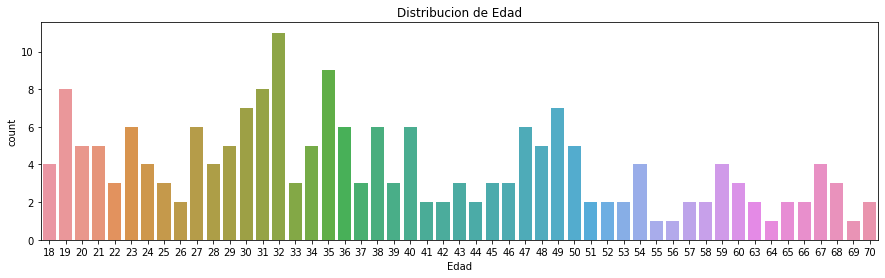

In [17]:
plt.figure(figsize=(15,4))
plt.title("Distribucion de Edad")
sns.countplot(x="Edad",data=df)
plt.show()

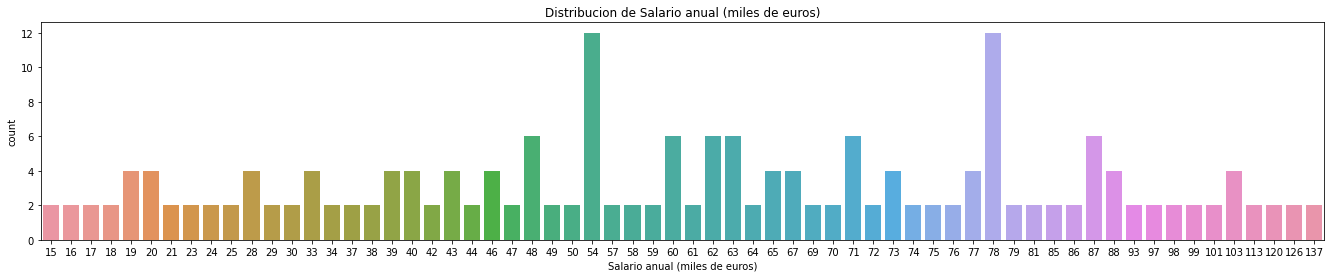

In [18]:
plt.figure(figsize=(23,4))
plt.title("Distribucion de Salario anual (miles de euros)")
sns.countplot(x="Salario anual (miles de euros)",data=df)
plt.show()

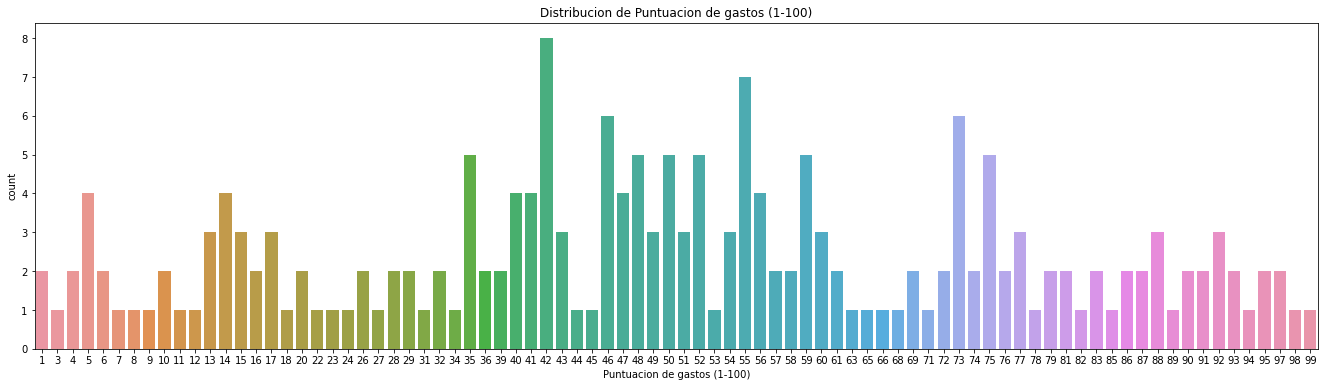

In [19]:
plt.figure(figsize=(23,6))
plt.title("Distribucion de Puntuacion de gastos (1-100)")
sns.countplot(x="Puntuacion de gastos (1-100)",data=df)
plt.show()

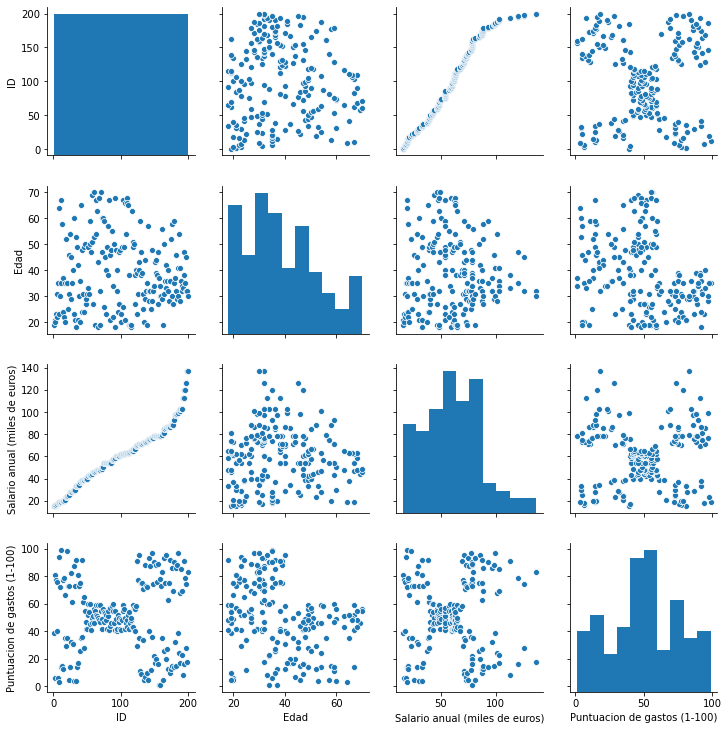

In [20]:
sns.pairplot(df)

r)Muestra el pairplot de todas las variables y analiza lo que ves. ¿Qué significa cada cosa?
¿Puedes sacar alguna conclusión o indicio a partir de los gráficos?
Con pairPlots lo que conseguimos es todas las graficas en las cuales el eje de las y es el valor de una columna de la tabla y el de las x otro valor
El grafico que relaciona el salario y la Edad nos indica que la gente con un mayor sueldo es aquella menor de 60 años a partir de esa edad no hay sueldos muy altos. Tambien las personas que mas cobran se encuentran en una franja de Edad entre los 30 y los 50 años.
De la grafica de Edad y puntuacion de Gasto podemos extraer que las personas que mas puntuacion de gasto tienen son aquellas que se encuentran entre los 20 y los 40 años.
La grafica de Puntuacion de gasto y Salario anual nos informa de que hay personas con un gran sueldo que se dejan muy poco dinero en nuestros extablecimientos tambien nos indica de que hay gente que cobra poco que quizas esta gastando por encima de sus posibilidades.
de.corr()

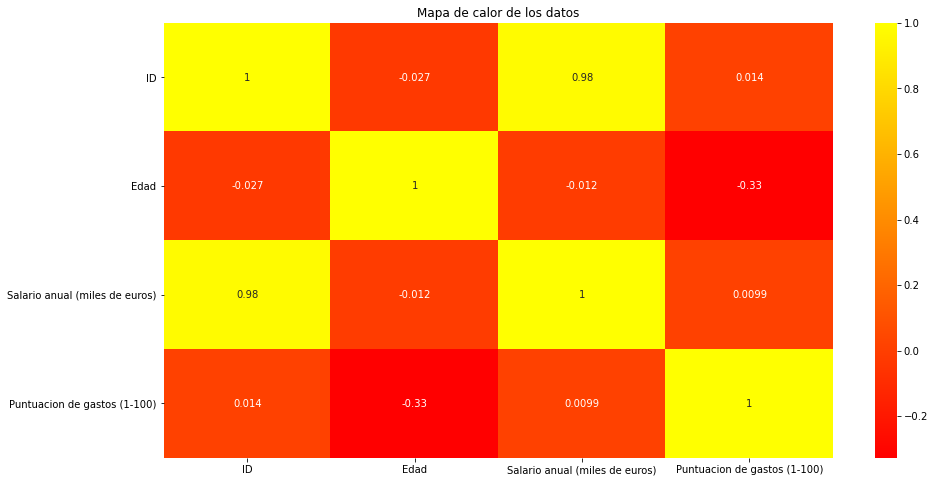

In [21]:
#annot=True sive para que pongan los valores en los cuadros
plt.figure(figsize=(15,8))
plt.title("Mapa de calor de los datos")
sns.heatmap(df.corr(),cmap="autumn",annot=True)
plt.xticks(rotation=0) 
plt.show()


t) ¿Nos interesa el atributo ID? ¿Por qué está tan correlado con el salario anual?
No, nos interesa el Id
Esta tan correlado con el salario anual porque a medida que aumenta el Id el valor de los sueldos va subiendo, los valores de la tabla esta ordenado de menor a mayos sueldo.

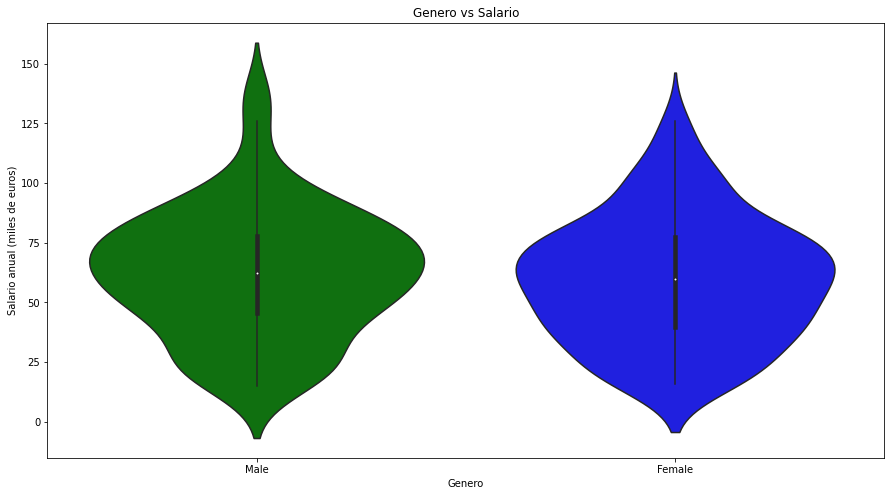

In [22]:
plt.figure(figsize=(15,8))
plt.title("Genero vs Salario")
sns.violinplot(data=df, x="Genero", y="Salario anual (miles de euros)", palette=['g','b'])
plt.show()

Se puede interpretar que las personas que mas cobran son hombres, ademas tambien se puede percibir que el area de los hombres se encuentra mas arriba que el de las mujeres

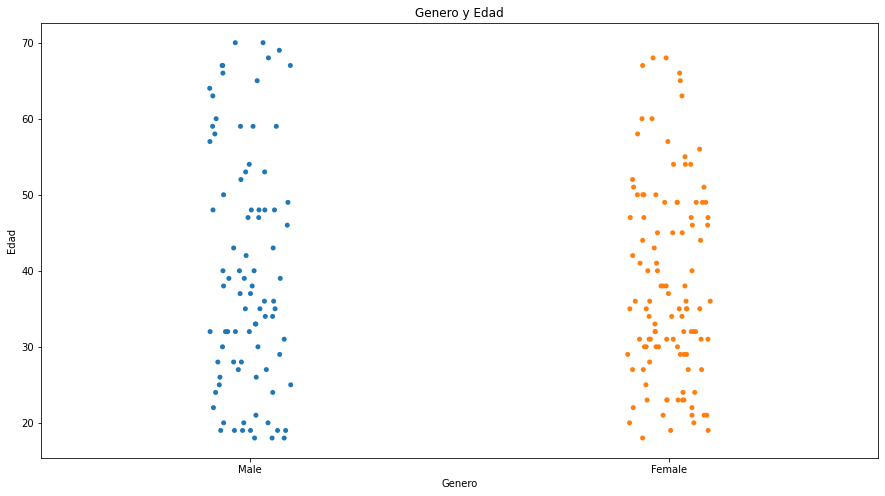

In [23]:

plt.figure(figsize=(15,8))
plt.title("Genero y Edad")
sns.stripplot(x="Genero", y="Edad", data=df)
plt.show()

Pues la verdad que yo creo que no se puede interpretar nada.

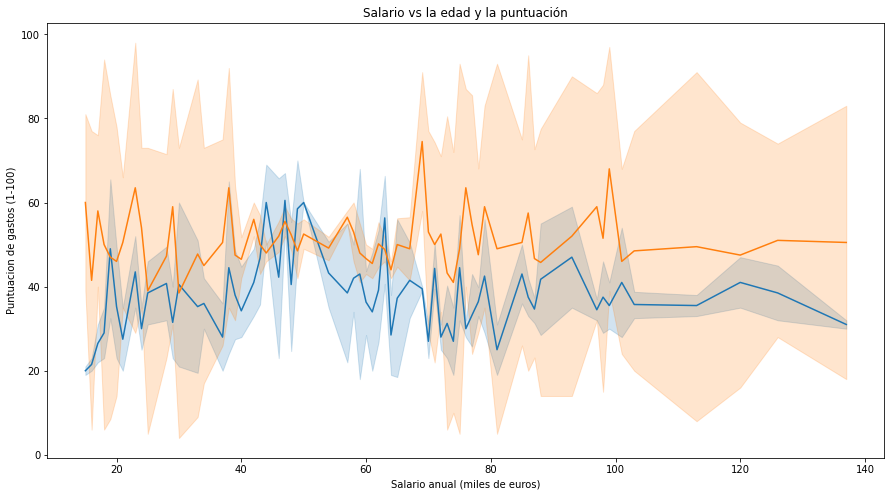

In [24]:
plt.figure(figsize=(15,8))
plt.title("Salario vs la edad y la puntuación")
sns.lineplot(data=df, x="Salario anual (miles de euros)", y="Edad")
sns.lineplot(data=df, x="Salario anual (miles de euros)", y="Puntuacion de gastos (1-100)")
plt.show()

x) ¿Qué significa la raya azul, la rosa, y los fondos difusos?
La raya azul indica el salario que cobra respecto de la edad
La raya naranja indica el salario que cobra respecto de la puntuacion de gasto
El fondo difuso nos indica que dentro de los clientes que cobran el mismo salario sobre esa zona sombreada se encuentra su puntuacion de gasto y su edad, ya que la posicion de la linea es la media de esos valores.

In [25]:
columnas=df.iloc[:,[3,4]]
columnas=pd.DataFrame(columnas)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(columnas)
labels = kmeans.fit_predict(columnas)
centroids = kmeans.cluster_centers_
print(centroids)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


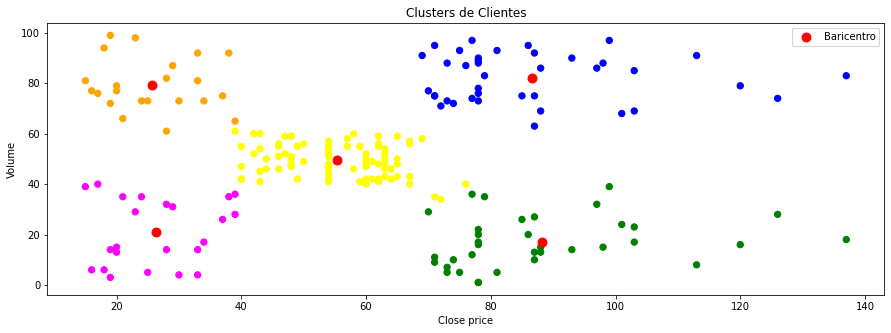

In [26]:
plt.figure(figsize=(15,5))
plt.title("Salario vs la edad y la puntuación")
y = df['Puntuacion de gastos (1-100)'].values
x = df['Salario anual (miles de euros)'].values
colores=['orange','green','blue','yellow','fuchsia']
Cluster=['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
asignar=[]
asignarC=[]
for row in labels:
    asignar.append(colores[row])
    asignarC.append(Cluster[row])
puntos=plt.scatter(x, y , c=asignar, s=40 )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=80, label="Baricentro") # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()

In [27]:
columnas=df.iloc[:,[3,4]]
columnas=pd.DataFrame(columnas)
columnas['Cluster'] = kmeans.labels_.astype("int64")
columnas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Salario anual (miles de euros)  200 non-null    int64
 1   Puntuacion de gastos (1-100)    200 non-null    int64
 2   Cluster                         200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


NameError: name 'df_data' is not defined

Ejercicio2

In [111]:
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
y_test.shape

(10000,)

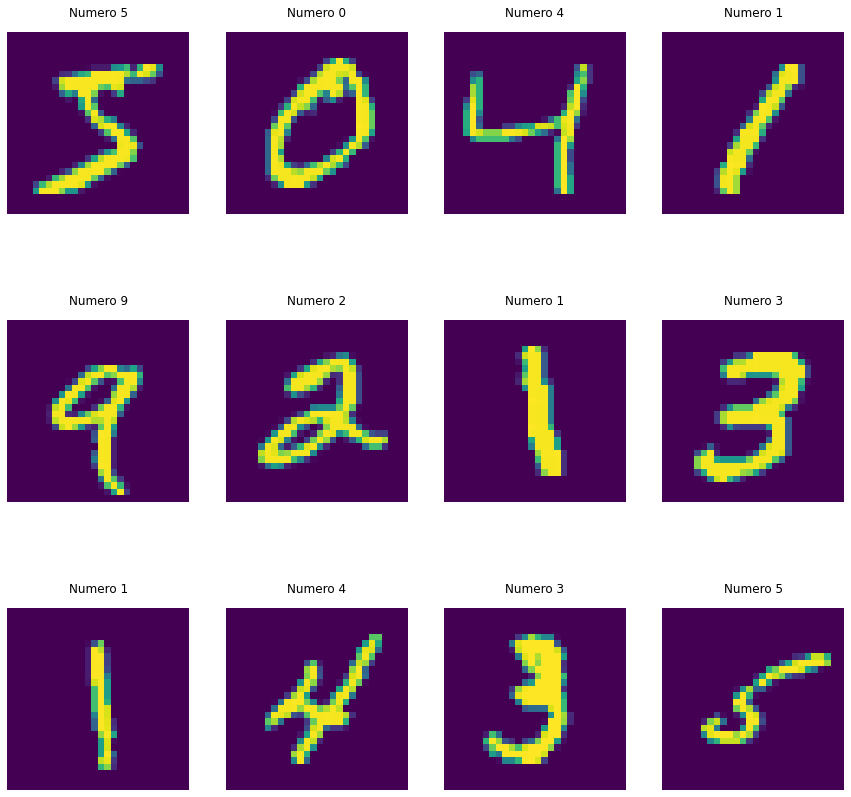

In [33]:
fig, axs=plt.subplots (3, 4,figsize=(15,15))
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.set_title("Numero "+str(y_train[i]))
    ax.axis('off')

In [108]:
x_train2=x_train.reshape(x_train.shape[0],784)
x_train2.shape

(60000, 784)

¿Qué dimensión tendrá que tener? 
28*28=784
1x784


In [35]:
x_train2 = x_train2.astype(np.float32)

In [36]:
x_train2=x_train2/255

In [37]:
x_train2.shape

(60000, 784)

In [38]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10).fit(x_train2)
labels = kmeans.fit_predict(x_train2)


In [83]:
print(kmeans.labels_[15:40])
print(kmeans.predict(x_train2)[15:40])

[2 1 0 6 2 5 4 2 8 3 1 5 7 2 8 3 0 6 2 4 8 6 4 5 6]
[2 1 0 6 2 5 4 2 8 3 1 5 7 2 8 3 0 6 2 4 8 6 4 5 6]


In [116]:
import statistics
def imagen_cluster(kmeans, labels):
    imagen_cluster = {}
    for i in range(kmeans.n_clusters):
        moda_imagen=statistics.mode(labels[kmeans.labels_ == i])
        if moda_imagen in imagen_cluster:
            imagen_cluster[moda_imagen].append(i)
        else:
            imagen_cluster[moda_imagen]=[i]
    return imagen_cluster

In [85]:
def modificar_label(labels, imagen_cluster):
    nuevolabels = np.zeros(len(labels)).astype(np.uint8)

    for i, cluster in enumerate(labels):
        for key, value in imagen_cluster.items():
            if cluster in value:
                nuevolabels[i] = key
            
    return nuevolabels

In [86]:
DictImagenCluster=imagen_cluster(kmeans, y_train)
DictImagenCluster

{8: [0], 2: [1], 7: [2], 1: [3, 8], 0: [4, 9], 4: [5], 6: [6], 3: [7]}

In [117]:
imagen_cluster = imagen_cluster(kmeans, y_train)
labels = kmeans.labels_
labels2 = modificar_label(labels, imagen_cluster)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 60000 but corresponding boolean dimension is 10000

In [88]:
print (imagen_cluster)
print (labels[:20])
print (labels2[:20])
print(np.unique(labels2))

{8: [0], 2: [1], 7: [2], 1: [3, 8], 0: [4, 9], 4: [5], 6: [6], 3: [7]}
[0 4 5 8 2 1 3 0 3 2 7 8 7 6 3 2 1 0 6 2]
[8 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7]
[0 1 2 3 4 6 7 8]


k) Comprueba que sigues teniendo 10 clusters. Realmente, no tendría por qué ser así. ¿Por
qué podría pasar que tuvieses ahora menos de 10 clústers?
Hay menos de 10 clusters porque hay clusters cuya moda es la misma que la de otros clusters 

In [80]:
from sklearn import metrics
kmeans.inertia_


2352812.0

Del paquete sklearn importa metrics. Crea una función para calcular y mostrar distintas
métricas, concretamente la inertia, homogeneidad (homogeneity_score) y la precisión
(accuracy_score). Busca brevemente lo que significa cada una.
Inercia: inercia, que es la suma de las distancias al cuadrado de cada objeto del Cluster a un punto 'μ' conocido como Centroide.Cuanto mas pequeño sea el resultado mas preciso habra sido el proceso de clustering
Homogeneidad:Un resultado de agrupamiento satisface la homogeneidad si todos sus grupos contienen solo puntos de datos que son miembros de una sola clase.
Precision: Nos devuelve el porcentaje clasificado correctamente

In [95]:
from sklearn import metrics
def metricas(prediccion, real, kmeans):
    print("Inercia:",kmeans.inertia_)
    print("Homogeneidad:",metrics.homogeneity_score(real,prediccion))
    print("Presion:",metrics.accuracy_score(real,prediccion))

In [98]:
metricas(y_train,labels2,kmeans)

Inercia: 2352811.0
Homogeneidad: 0.5418397850201359
Presion: 0.5907666666666667


Tenemos un dato de precision del 54% y un 59% de homogeneidad

¿Tiene sentido aumentar el número de clusters? ¿Mejorarán los datos? ¿Qué pasa
realmente? Pruébalo y muestra los datos de evaluación que obtienes con distinto
número de clusters.
Pues quizas si tenga sentido aumentar el numero de clusters ya que cuando cambiamos los numeros del label que nos devuelve el metodo K means estamos reduciendo el numero de clusters y hay imagenes de numeros que no estamos teniendo en cuenta.
Al aumentar el numero de clusters la precision aumenta y la inercia cada vez es mas pequeña, es decir que mejora el resultado.

In [106]:
num=[12,14,15,16]
for n in num:
    kmeans = KMeans(n_clusters = n).fit(x_train2)
    labels = kmeans.fit_predict(x_train2)
    dicImagenCluster = imagen_cluster(kmeans, y_train)
    labels2 = modificar_label(kmeans.labels_, dicImagenCluster)
    print("Con ",n," Clusters")
    metricas(y_train,labels2,kmeans)



Con  12  Clusters
Inercia: 2288971.25
Homogeneidad: 0.565426164052821
Presion: 0.63985
Con  14  Clusters
Inercia: 2231073.25
Homogeneidad: 0.5787032877184902
Presion: 0.6561333333333333
Con  15  Clusters
Inercia: 2205869.25
Homogeneidad: 0.5772367400491252
Presion: 0.6759166666666667
Con  16  Clusters
Inercia: 2183777.25
Homogeneidad: 0.5899553195718559
Presion: 0.6867833333333333


o)Prueba con los datos de test para saber realmente cómo de bueno es tu modelo

In [112]:
x_test2=x_test.reshape(x_test.shape[0],784)
x_test2.shape

(10000, 784)

In [113]:
x_test2=x_test2/255

In [119]:
num=[10,12,14,15]
for n in num:
    kmeans = KMeans(n_clusters = n).fit(x_test2)
    labels = kmeans.fit_predict(x_test2)
    dicImagenCluster = imagen_cluster(kmeans, y_test)
    labels2 = modificar_label(kmeans.labels_, dicImagenCluster)
    print("Con ",n," Clusters")
    metricas(y_test,labels2,kmeans)

Con  10  Clusters
Inercia: 389396.01433683414
Homogeneidad: 0.5272829884316121
Presion: 0.594
Con  12  Clusters
Inercia: 378445.5364578392
Homogeneidad: 0.5360390062108471
Presion: 0.6223
Con  14  Clusters
Inercia: 369009.9408792011
Homogeneidad: 0.595499913974366
Presion: 0.6562
Con  15  Clusters
Inercia: 365103.1112480928
Homogeneidad: 0.5811932491371259
Presion: 0.6738


In [136]:
kmeans = KMeans(n_clusters = 15 ).fit(x_train2)
labels = kmeans.fit_predict(x_train2)
dicImagenCluster = imagen_cluster(kmeans, y_train)
labels2 = modificar_label(kmeans.labels_, dicImagenCluster)
print("Con 15 Clusters")
metricas(y_train,labels2,kmeans)

Con 15 Clusters
Inercia: 143437039619.59363
Homogeneidad: 0.5784596145202902
Presion: 0.6769


In [130]:
centroids = kmeans.cluster_centers_
centroids2=centroids.reshape(centroids.shape[0],28,28)
numCentr=[x for x in range(0,len(centroids2))]
numCentr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [132]:
numerosDeducidos=modificar_label(numCentr, dicImagenCluster)
numerosDeducidos

array([4, 1, 0, 1, 3, 6, 3, 2, 8, 6, 0, 9, 7], dtype=uint8)

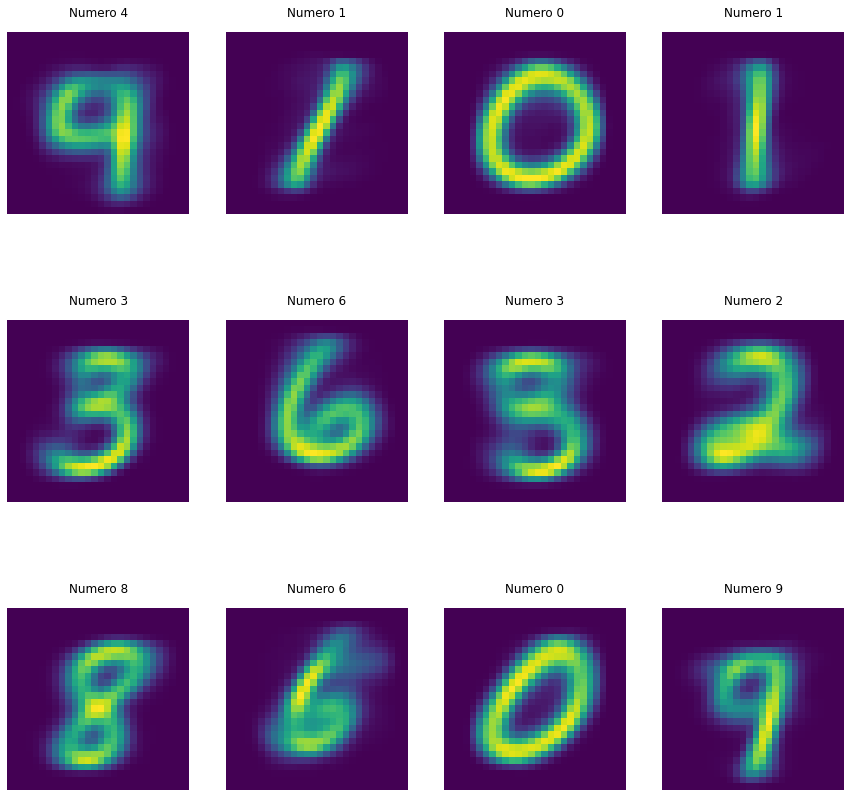

In [135]:
fig, axs=plt.subplots (3, 4,figsize=(15,15))
for i, ax in enumerate(axs.flat):
    ax.matshow(centroids2[i])
    ax.set_title("Numero "+str(numerosDeducidos[i]))
    ax.axis('off')

¿Podría pasar que se haya deducido mal la etiqueta correspondiente del clúster?
Podria pasar pero es poco probable ya que los elegido una etiqueta como baricentro lo normal es que el resto de etiquetas que formaran el cluster sean en su mayorias similares a la etiqueta usada como baricentro, ya que seran los puntos que se encontren mas cerca del baricentro elegido.